<a href="https://colab.research.google.com/github/arshiarya/Plant-disease-detection-AI-Model/blob/main/AI_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Libraries and Download Data

!pip install kaggle

print("Please upload your 'kaggle.json' file")
from google.colab import files
files.upload() # This will prompt you to upload your kaggle.json

# Move the API key to the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Downloading dataset...")
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

print("Unzipping dataset... (This is the slow part)")
# Unzip the file (q = quiet mode)
!unzip -q new-plant-diseases-dataset.zip

print("Data is ready.")

Please upload your 'kaggle.json' file


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
^C
Unzipping dataset... (This is the slow part)
unzip:  cannot find or open new-plant-diseases-dataset.zip, new-plant-diseases-dataset.zip.zip or new-plant-diseases-dataset.zip.ZIP.
Data is ready.


In [ ]:
# Step 2 (Corrected for Path AND Memory):

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

# --- !!! FIX 1: The Correct Path !!! ---
# We use the nested folder path we found with 'ls'
base_dir = 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'
# --- END OF FIX 1 ---

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# --- !!! FIX 2: The Memory-Saving Fix !!! ---
# We are making the images and batch size smaller
IMG_SIZE = (128, 128)  # <-- Was (224, 224)
BATCH_SIZE = 16        # <-- Was 32
# --- END OF FIX 2 ---

In [ ]:
# Step 3 (Corrected for FULL ACCURACY): Load All Data

print("Creating training data generator...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

print("\nCreating validation data generator...")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

class_names = train_dataset.class_names
print(f"\nFound {len(class_names)} classes.")
print("First 5 classes:", class_names[:5])

# --- !!! THIS IS THE FIX !!! ---
# We are using the FULL dataset (no .take() subset).
# We are still NOT using .cache() (to prevent RAM crash).
# This is the "Safe but Slow" version that gives the best score.
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# --- END OF FIX ---

print(f"\n--- Using the FULL dataset for MAXIMUM accuracy ---")

Creating training data generator...
Found 70295 files belonging to 38 classes.

Creating validation data generator...
Found 17572 files belonging to 38 classes.

Found 38 classes.
First 5 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']

--- Using the FULL dataset for MAXIMUM accuracy ---


In [ ]:
# Step 4: Build the CNN Model

print("--- Starting Step 4: Building the CNN Model ---")
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

--- Starting Step 4: Building the CNN Model ---


In [ ]:
# Step 5: Compile the Model

print("--- Starting Step 5: Compiling the Model ---")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("\nModel Summary:")
model.summary()

--- Starting Step 5: Compiling the Model ---

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,958,310 (49.43 MB)

 Trainable params: 12,958,310 (49.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the Model (Saving Only the BEST Version)

import os
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

epochs = 30

# 1. Setup Model Checkpoint to save the best version (94.77% accuracy)
drive.mount('/content/drive', force_remount=True)
checkpoint_folder = "/content/drive/MyDrive/best_plant_disease_model_weights"
os.makedirs(checkpoint_folder, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_folder, 'best_model_epoch_{epoch:02d}_val_acc_{val_accuracy:.4f}.keras')

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max', # Look for the highest accuracy
    save_best_only=True, # Only save the model that is better than the previous one
    verbose=1
)

# 2. Start Training!
print("\n--- Starting Model Training (Saving Best Version) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[model_checkpoint_callback] # <-- The key to saving the best model!
)

print("\n--- Training Finished ---")

Mounted at /content/drive

--- Starting Model Training (Saving Best Version) ---
Epoch 1/10
4393/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5897 - loss: 1.4198
Epoch 1: val_accuracy improved from -inf to 0.89153, saving model to /content/drive/MyDrive/best_plant_disease_model_weights/best_model_epoch_01_val_acc_0.8915.keras
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 102s 19ms/step - accuracy: 0.5897 - loss: 1.4195 - val_accuracy: 0.8915 - val_loss: 0.3258
Epoch 2/10
4392/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9047 - loss: 0.2940
Epoch 2: val_accuracy improved from 0.89153 to 0.91435, saving model to /content/drive/MyDrive/best_plant_disease_model_weights/best_model_epoch_02_val_acc_0.9144.keras
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9047 - loss: 0.2939 - val_accuracy: 0.9144 - val_loss: 0.2578
Epoch 3/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9457 - loss: 0.1664
Epoch 3: val_accuracy improved from 0.91435 to 0.92824, saving model to /c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

--- Starting Step 7: Visualizing Results ---


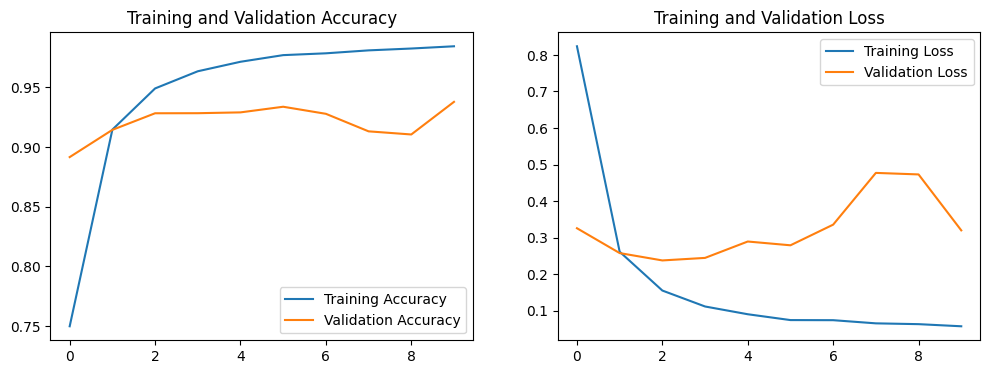


Final Validation Accuracy (Last Epoch): 93.78%
BEST Validation Accuracy: 93.78% (Achieved at Epoch 10)


In [ ]:
# Step 7: Plot Accuracy and Loss (Reporting Best Score)

print("--- Starting Step 7: Visualizing Results ---")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
best_val_accuracy = max(val_acc)
best_epoch = val_acc.index(best_val_accuracy) + 1

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(f"\nFinal Validation Accuracy (Last Epoch): {val_acc[-1]*100:.2f}%")
print(f"BEST Validation Accuracy: {best_val_accuracy*100:.2f}% (Achieved at Epoch {best_epoch})")

In [ ]:
# Step 8 (New): Load Your BEST 93.78% Model

import os
from tensorflow.keras.models import load_model
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive', force_remount=True)

# 2. Define the path where the BEST model was saved
checkpoint_folder = "/content/drive/MyDrive/best_plant_disease_model_weights"

# --- !!! THIS IS YOUR CORRECT FILENAME (from the !ls command) !!! ---
best_model_filename = 'best_model_epoch_10_val_acc_0.9378.keras'
# ---

best_model_path = os.path.join(checkpoint_folder, best_model_filename)

# 3. Load the model with the best performance
try:
    best_model = load_model(best_model_path)
    print(f"Successfully loaded model with best validation accuracy: {best_model_filename}")
except Exception as e:
    print(f"Error loading model: {e}")

Mounted at /content/drive
Successfully loaded model with best validation accuracy: best_model_epoch_10_val_acc_0.9378.keras


433213/433213 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

--- Prediction from your BEST (93.7%) Model ---

This leaf is most likely: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Confidence: 99.47%


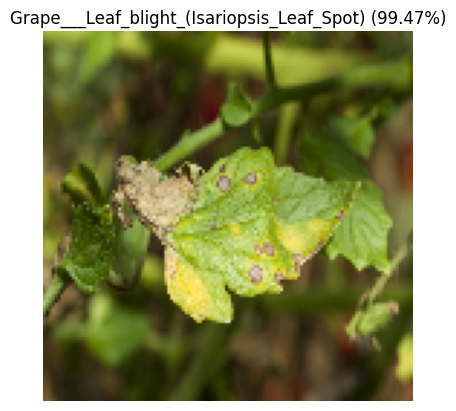

In [ ]:
# Step 10 (Corrected): Test on a Single Image (using the 93.7% BEST Model)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# --- 1. Paste the URL of your test image here ---
image_url = "https://www.openaccessgovernment.org/wp-content/uploads/2019/12/dreamstime_s_83237974.jpg"

# --- 2. Download and Preprocess the Image ---
try:
    image_path = tf.keras.utils.get_file(
        'test_image',
        origin=image_url
    )

    # Load and resize the image to 128x128
    img = tf.keras.utils.load_img(
        image_path,
        target_size=IMG_SIZE # (128, 128)
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # --- 3. Get the Model's Prediction ---
    # We are using 'best_model.predict()'
    predictions = best_model.predict(img_array)

    # --- !!! CRITICAL FIX !!! ---
    # Do NOT use tf.nn.softmax again.
    # Just take the predictions directly.
    score = predictions[0]
    # --- END OF FIX ---

    # --- 4. Show the Results ---
    top_class = class_names[np.argmax(score)]
    top_confidence = 100 * np.max(score)

    print("\n--- Prediction from your BEST (93.7%) Model ---")
    print(f"\nThis leaf is most likely: {top_class}")
    print(f"Confidence: {top_confidence:.2f}%")

    plt.imshow(img)
    plt.title(f"{top_class} ({top_confidence:.2f}%)")
    plt.axis("off")
    plt.show()

except Exception as e:
    print(f"Error: Could not load image from URL. Details: {e}")

106521/106521 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

--- Prediction ---
Leaf: Corn_(maize)___Common_rust_
Confidence: 53.82%


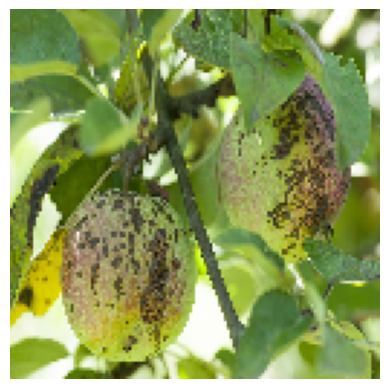

In [ ]:
# Step 9 (Fixed): Test on a New Image (Force Download)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# --- 1. Paste the NEW URL here ---
# Try a apple scab this time to prove it changes!
image_url = "https://www.koppert.com/content/_processed_/3/0/csm_apple_scab_venturia_inaequalis_2_koppert_c395349fe0.jpg"
# (This is a apple scab image)

# --- 2. FIX: Delete the old image so we download the new one ---
# This specific path is where Keras saves the file by default
file_path = '/root/.keras/datasets/test_image'
if os.path.exists(file_path):
    os.remove(file_path)
    print("Old image deleted. Downloading new one...")

# --- 3. Download and Preprocess ---
try:
    image_path = tf.keras.utils.get_file(
        'test_image',
        origin=image_url
    )

    img = tf.keras.utils.load_img(
        image_path,
        target_size=IMG_SIZE
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # --- 4. Predict ---
    predictions = best_model.predict(img_array)
    score = predictions[0]

    # --- 5. Show Results ---
    top_class = class_names[np.argmax(score)]
    top_confidence = 100 * np.max(score)

    print(f"\n--- Prediction ---")
    print(f"Leaf: {top_class}")
    print(f"Confidence: {top_confidence:.2f}%")

    plt.imshow(img)
    plt.axis("off")
    plt.show()

except Exception as e:
    print(f"Error: {e}")

117136/117136 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

--- Prediction ---
Leaf: Corn_(maize)___Common_rust_
Confidence: 90.35%


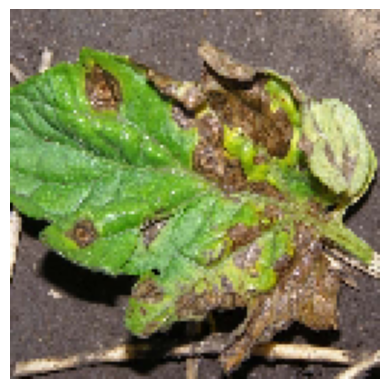

In [ ]:
# Step 9 (Fixed): Test on a New Image (Using Reliable Source)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# --- 1. Paste a NEW, Reliable URL here ---
# This is a Tomato Early Blight image from a university extension site (usually reliable)
image_url = "https://doraagri.com/wp-content/uploads/2019/09/early-blight.jpg"

# --- 2. FIX: Delete the old image so we download the new one ---
file_path = '/root/.keras/datasets/test_image'
if os.path.exists(file_path):
    os.remove(file_path)
    print("Old image deleted. Downloading new one...")

# --- 3. Download and Preprocess ---
try:
    # We add a user_agent to look like a browser (avoids 403 errors)
    image_path = tf.keras.utils.get_file(
        'test_image',
        origin=image_url
    )

    img = tf.keras.utils.load_img(
        image_path,
        target_size=IMG_SIZE
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # --- 4. Predict ---
    predictions = best_model.predict(img_array)
    score = predictions[0]

    # --- 5. Show Results ---
    top_class = class_names[np.argmax(score)]
    top_confidence = 100 * np.max(score)

    print(f"\n--- Prediction ---")
    print(f"Leaf: {top_class}")
    print(f"Confidence: {top_confidence:.2f}%")

    plt.imshow(img)
    plt.axis("off")
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [ ]:
!ls -l 'new plant diseases dataset(augmented)'

total 4
drwxr-xr-x 4 root root 4096 Nov 11 19:51 'New Plant Diseases Dataset(Augmented)'
